# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
unexpected = pd.read_csv('Unplanned_Hospital_Visits.csv')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
unexpected.shape

(67872, 20)

In [3]:
# Peaking at the data to get the information
unexpected.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Number of Patients,Number of Patients Returned,Footnote,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_AMI,Hospital return days for heart attack patients,Average Days per 100 Discharges,424,6.5,-8.1,23.7,406,116,NaN,07/01/2017,12/01/2019
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_HF,Hospital return days for heart failure patients,More Days Than Average per 100 Discharges,904,16.1,1.1,33.1,691,244,NaN,07/01/2017,12/01/2019
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_PN,Hospital return days for pneumonia patients,Average Days per 100 Discharges,503,-7.1,-21.2,8.2,462,117,NaN,07/01/2017,12/01/2019
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,350,12.2,8.6,17.2,Not Applicable,Not Applicable,NaN,01/01/2018,12/31/2020
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_35_ADM,Rate of inpatient admissions for patients rece...,No Different Than the National Rate,142,5.9,4.2,8.2,Not Applicable,Not Applicable,NaN,07/01/2020,12/31/2020


In [4]:
# cross verifying how many unqiue values are contained in each field

# Creating a new dataframe with the fields' unique value counts
different_counts_df = unexpected.nunique().reset_index()

# Renaming columns
different_counts_df.columns = ["field", "unique_values"]

# Sorting by unique values and printing
different_counts_df.sort_values("unique_values", ascending = False)

,field,unique_values
0,Facility ID,4848
7,Phone Number,4831
2,Address,4818
1,Facility Name,4699
5,ZIP Code,4433
3,City,2947
11,Denominator,2114
6,County Name,1557
14,Higher Estimate,1428
12,Score,1238


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [5]:
# Which field contains the most distinct values? It's obvious from the dataframe, but I can do it programmatically as well:
different_counts_df.sort_values("unique_values", ascending = False)["field"][0]


'Facility ID'

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [6]:
# Because we can see from the unique value count exercise that all of the columns have more than one unique value, we can deduce that there will be no columns with identical rows.
# Nonetheless, we can check if there are any columns like this programmatically.

def column_check(df):
    """
    (pandas dataframe) -> list/string
    
    Feed the function a dataframe and this function will tell you which field(s) have only one single value.
    """
    
    df_trans = df.nunique().reset_index()
    df_trans.columns = ["field", "unique_values"]
    
    result = []
    
    for i in list(df_trans['field']):
        if list((df_trans[df_trans['field'] == i]['unique_values'] == 1))[0]:
            result = result.append(i)
    
    if (result == []):
        result = 'All columns contain more than 1 unique value!'
        
    return result

In [7]:
column_check(unexpected)

'All columns contain more than 1 unique value!'

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


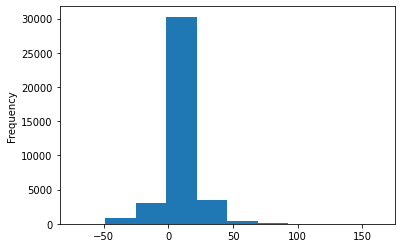

In [8]:
# cleaning the data a little bit. I plan to use the score column
unexpected_clean = unexpected[unexpected['Score'] != 'Not Available']
unexpected_clean['Score'] = unexpected_clean['Score'].astype(float)

# Plotting
unexpected_clean.Score.plot.hist()

In [9]:
unexpected_clean.dtypes

Facility ID                     object
Facility Name                   object
Address                         object
City                            object
State                           object
ZIP Code                         int64
County Name                     object
Phone Number                    object
Measure ID                      object
Measure Name                    object
Compared to National            object
Denominator                     object
Score                          float64
Lower Estimate                  object
Higher Estimate                 object
Number of Patients              object
Number of Patients Returned     object
Footnote                        object
Start Date                      object
End Date                        object
dtype: object

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

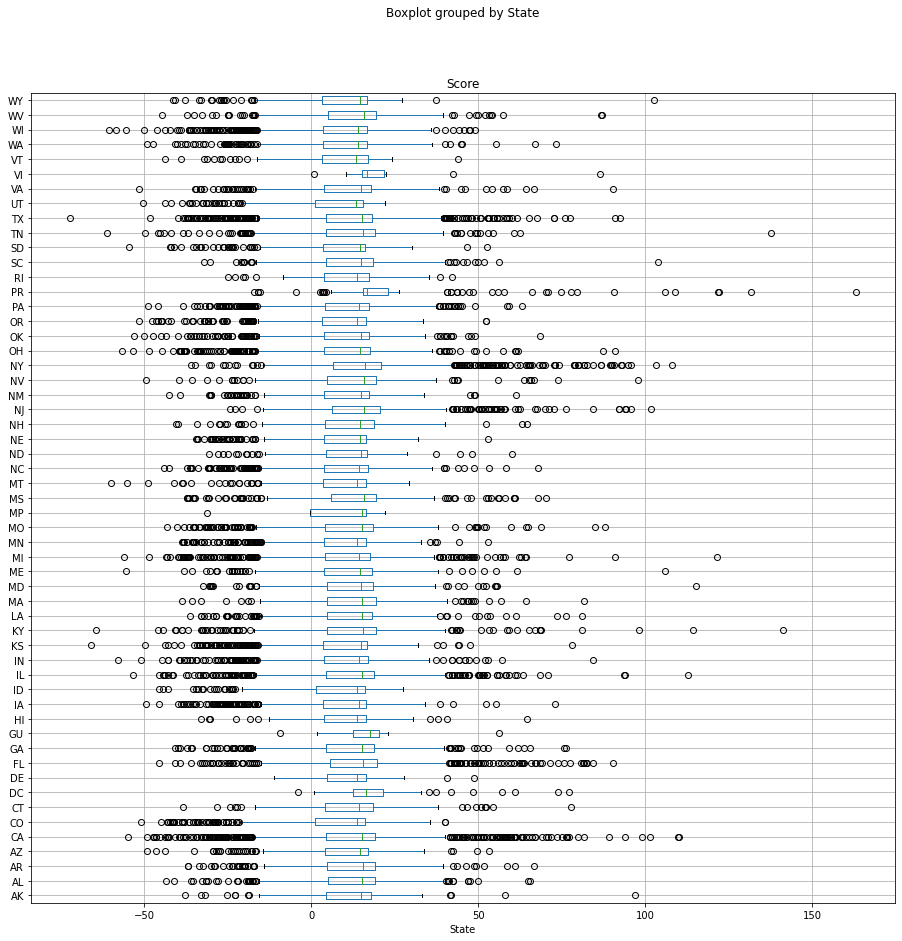

In [10]:
# I want to look at boxplots of score for each state, rotated 

unexpected_clean.boxplot(column = 'Score',
                        by = 'State',
                        vert = False,
                       figsize = (15,15))



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [11]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add week13_assignment_2.ipynb
    !git commit -a -m "Submitting the week 12 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main 518d89e] Submitting the week 12 programming assignment
 2 files changed, 1282 insertions(+), 14 deletions(-)
 create mode 100644 week 13/week13_assignment_2.ipynb
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 100.54 KiB | 8.38 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 1 local object.
remote: This repository moved. Please use the new location:
remote:   git@github.com:Surya-Boppana/hds5210-2022.git
To github.com:surya-boppana/hds5210-2022.git
   366a146..518d89e  main -> main
